In [2]:
# -*- coding: utf-8 -*-
"""AndreWilliamsDataAnalysisAssignment.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1Ao3YcPvtkV_nX503wJ7mYN_EXquXNLp_
"""

# Commented out IPython magic to ensure Python compatibility.
# importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
# %matplotlib inline

"""# Pre-Deliverable

1.   Import File
2.   Clean Data
3.   Create Functions
"""

# Reading input csv file
filename = r'C:\Users\AXW0J9E\Downloads\Genetic-Predictor-main\Genetic-Predictor-main\TrainingData_N183_p10.csv' 
data     = pd.read_csv(filename)
print(data.head())
print(data.shape)

C:\Users\AXW0J9E\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


         PC1       PC2       PC3       PC4        PC5       PC6       PC7  \
0 -10.901171  0.798743 -1.143301 -1.070960  11.856396 -2.265965  4.536405   
1  -9.990054  1.416821 -0.729626 -0.443621  10.418594  0.443514  2.640659   
2  -9.345388  2.913054 -0.921421  0.029173  10.672615 -2.052552  5.140476   
3 -11.221507  1.733021 -2.339817  0.045786  13.195087 -3.068897  2.863434   
4 -10.175158  2.066307 -0.785493 -0.632400   7.461272 -1.643509  0.715258   

        PC8       PC9      PC10 Ancestry  
0  1.519959 -2.214294 -0.671274  African  
1 -4.637746  3.351629 -0.671274  African  
2 -1.451096  0.444183 -0.671274  African  
3 -2.259194  2.374566 -0.671274  African  
4 -3.982752  0.098681 -0.671274  African  
(183, 11)


In [3]:

# Creating numpy arrays for training features X and target labels y
X_train = np.array(data.iloc[:,:-1])
y_train = np.array(data.iloc[:,-1])
print(X_train.shape)
print(y_train.shape)
print(sorted(np.unique(y_train)))
final_catagory = sorted(np.unique(y_train))

# defining function to encode target label values to integers
# mapping ['African' 'EastAsian' 'European' 'NativeAmerican' 'Oceanian'] values in y_train to [0,1,2,3,4]

target_names = sorted(list(np.unique(y_train)))
for i in range(len(y_train)) :
    val = y_train[i]
    index = target_names.index(val)
    y_train[i] = index 

print(np.unique(y_train))

# Defining functions for standardizing input features X (a numpy array)
# Dimension of X is assumed to be (num_samples, num_features)

# Function for standardizing X 
def standardize_X(X) :
    mean_X = np.mean(X, axis=0)
    mean_X = mean_X.reshape([1,-1]) # reshaping mean_X to dim (1,9) , useful for broadcasting in following steps
    X_p    = X - mean_X 
    std_X  = np.std(X_p, axis=0) # computing standard deviation 
    std_X  = std_X.reshape([1,-1]) # reshaping std_X to dim (1,9) , useful for broadcasting in following steps
    X_p    = X_p / std_X 
    return X_p, mean_X, std_X

# Standardizing input features X_train
X_train, mean_X, std_X = standardize_X(X_train)
print('Mean_X' , mean_X)
print('STD_X'  , std_X)


(183, 10)
(183,)
['African', 'EastAsian', 'European', 'NativeAmerican', 'Oceanian']
[0 1 2 3 4]
Mean_X [[ 1.40487976e+00  2.02293488e+00  1.91271130e-03  1.02811502e-01
   2.43929372e-01  2.93901516e-01  4.37620184e-02 -1.85769325e-01
   1.03879526e-01 -4.17198356e-02]]
STD_X [[4.8993287  3.47654999 3.90903976 3.149965   2.14032401 1.77048761
  1.58593444 1.50391174 1.58141009 0.97706561]]


In [4]:
# Defining a function for adding a feature with constant value of 1 to all X_train samples (for representing bias term)
# Input is feature array X (of shape num_samples x num_features)
# Output is augmented feature array aug_X (with column of 1s added to X)
def get_Xaugmented(X):
    arr_ones = np.ones(shape=(X.shape[0],1), dtype="float64")
    X_aug = np.concatenate(( arr_ones , X ) , axis=1) # _aug for augmented X
    return X_aug

In [5]:
def perform_multi_log_reg(X, y, epochs, lr, lmbda ) :
    num_samples  = X.shape[0]
    num_features = X.shape[1]
    num_classes  = len(np.unique(y_train)) # get number of classes by counting unique values

    # adding a column of 1s to X
    X_aug = get_Xaugmented(X)
    
    # creating Y array 
    Y     = np.zeros((num_samples, num_classes))
    for i in range(len(y)):
        index = np.squeeze(y[i])
        Y[i,index] = 1
    
    # Randomnly initializing B_reg_coeffs array 
    B_reg_coeffs = np.random.uniform(low=-1, high=1, size=(num_features+1 , num_classes))    
    
    for i in range(epochs):
    
        # Computing exp_XB array representing unnormalized class probabilities
        XB = np.matmul(X_aug, B_reg_coeffs)
        exp_XB = np.exp(XB)
    
        # Computing P array representing normalized class probabilities 
        sum_exp_XB = np.sum(exp_XB, axis=1, keepdims=True)
        P = exp_XB/sum_exp_XB
    
        # Computing Z matrix for ease of subsequent computations
        Z = np.zeros_like(B_reg_coeffs)
        Z[0,:] = B_reg_coeffs[0,:]
    
        # Updating B_reg_coeffs matrix 
        B_reg_coeffs = B_reg_coeffs + lr*( np.matmul( X_aug.T , Y - P ) - 2*lmbda*(B_reg_coeffs - Z) )
        
        #if (i%1000 == 0) or (i == epochs-1):
            #print("{} epochs completed".format(i+1))
    
    return B_reg_coeffs

(9, 11, 5)


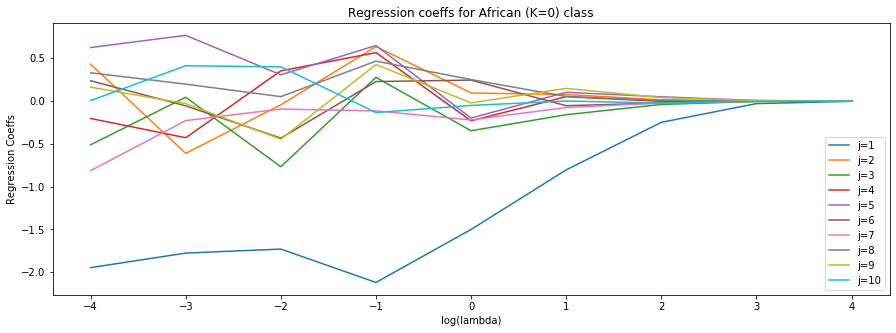

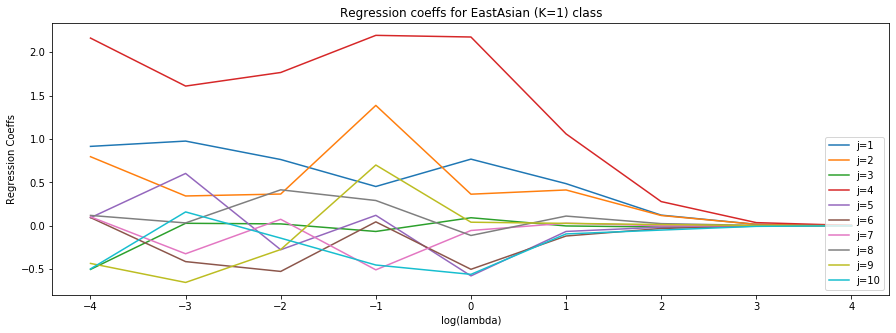

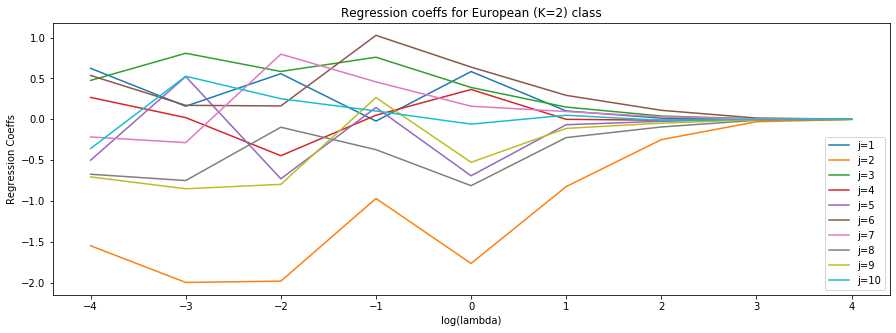

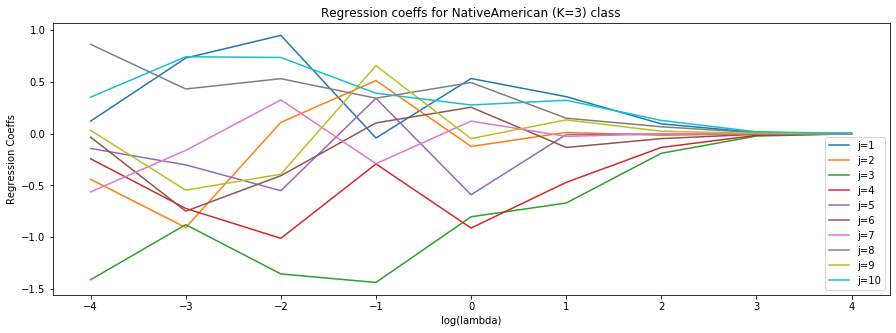

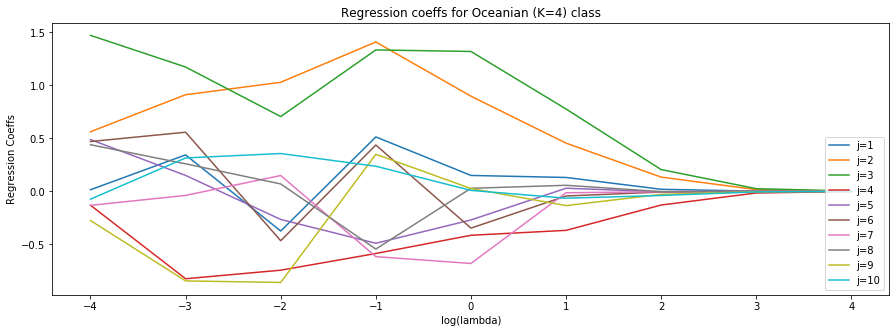

In [6]:
"""# Deliverable 1
Create Plot
"""

# Finding learned regression coefficients for each of lmbda values

# defining values for tuning parameter lambda 
lmbdas     = np.array([1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4])
log_lmbdas = np.log10(lmbdas)

# Defining learning rate alpha 
learning_rate = 1e-5 

# creating a list for storing B_reg_coeffs learned for each of the lmbda values 
list_B_reg_coeffs = []
for lmbda in lmbdas :
    B_reg_coeffs = perform_multi_log_reg(X_train, y_train, epochs=10000, lr=learning_rate, lmbda=lmbda )
    list_B_reg_coeffs.append(B_reg_coeffs)

# converting list list_B_reg_coeffs to numpy array
arr_B_reg_coeffs = np.array(list_B_reg_coeffs)
print(arr_B_reg_coeffs.shape) # array of shape num_lmbdas x (num_features+1) x num_classes 

#print(len(list_B_reg_coeffs))
#print(list_B_reg_coeffs[0].shape)

# Generating plots 

num_features = X_train.shape[1]
num_classes  = len(target_names)
num_lmbdas   = len(lmbdas)

for i in range(num_classes) :
    plt.figure(figsize=(15,5))
    plt.title("Regression coeffs for {} (K={}) class".format(target_names[i], i))
    plt.xlabel("log(lambda)")
    plt.ylabel("Regression Coeffs")
    for j in range(1, num_features+1) :
        coeffs = arr_B_reg_coeffs[:,j,i]
        plt.plot(log_lmbdas , coeffs, label="j={}".format(j))
    plt.legend(loc="lower right")

In [7]:
def compute_categorical_crossentropy_loss(y_true, y_pred_probs) :

#     Optional for computing and printing classification accuracy    
#     y_pred_class = np.argmax(y_pred_probs, axis=1)
#     accuracy = np.sum(y_pred_class == y_true)/len(y_true)
#     print("Accuracy {}".format(accuracy))
    
    num_samples = y_true.shape[0]
    num_output_classes = y_pred_probs.shape[1]
    log_losses = []
    for i in range(num_samples) :
        pred_prob_true_class     = y_pred_probs[i,y_true[i]]
        log_loss = -np.log10(pred_prob_true_class)
        log_losses.append(log_loss)
    crossentropy_loss = np.mean(log_losses)   
    return crossentropy_loss

In [8]:
def compute_prediction_probs( X , B_reg_coeffs ) :
    X_aug = get_Xaugmented(X)
    output_scores = np.matmul(X_aug, B_reg_coeffs)
    exp_output_scores = np.exp(output_scores)
    sum_exp_output_scores = np.sum(exp_output_scores, axis=1, keepdims=True)
    y_pred_probs = exp_output_scores / sum_exp_output_scores
    return y_pred_probs

Computing 5-fold cross validation error for tuning parameter=0.0001
CV_error 0.04911004486704758
Computing 5-fold cross validation error for tuning parameter=0.001
CV_error 0.04891339085942137
Computing 5-fold cross validation error for tuning parameter=0.01
CV_error 0.04035035183481796
Computing 5-fold cross validation error for tuning parameter=0.1
CV_error 0.059467087769884616
Computing 5-fold cross validation error for tuning parameter=1.0
CV_error 0.05365451164205297
Computing 5-fold cross validation error for tuning parameter=10.0
CV_error 0.15243109885739306
Computing 5-fold cross validation error for tuning parameter=100.0
CV_error 0.48337223577352617
Computing 5-fold cross validation error for tuning parameter=1000.0
CV_error 0.6604019643769748
Computing 5-fold cross validation error for tuning parameter=10000.0
CV_error 0.6800050661337507


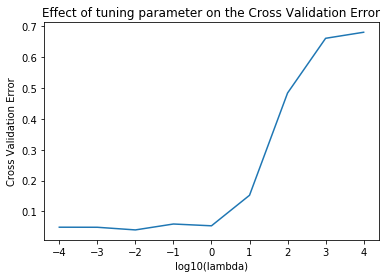

In [9]:

lmbdas     = np.array([1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4])
log_lmbdas = np.log10(lmbdas)
#print(log_lmbda)

# validation data start and end indices for 5-fold cross validation
num_samples = X_train.shape[0]
fold_factor = 5 
num_samples_val = num_samples//fold_factor
s_indices = [ num_samples_val*ind for ind in range(fold_factor)]
e_indices = [ ind + num_samples_val for ind in s_indices ]
# print(s_indices)
# print(e_indices)

# Randomnly shuffling values in X_train and y_train 
np.random.seed(0) # to make results reproducible
indices = np.random.permutation(X_train.shape[0])
X_train_shuffled = X_train[indices,:]
y_train_shuffled = y_train[indices]

learning_rate = 1e-5
CV_errors = [] # initializing empty list for storing the cross validation errors for each of the tuning parameter lmbda values     
for i, lmbda in enumerate(lmbdas) :
    print('Computing 5-fold cross validation error for tuning parameter={}'.format(lmbda))
    categorical_crossentropy_losses = [] 
    for i in range(fold_factor) :
        s_index = s_indices[i]
        e_index = e_indices[i]
        X_val_split   = X_train_shuffled[s_index:e_index, :]
        y_val_split   = y_train_shuffled[s_index:e_index]
        X_train_split = np.vstack(( X_train_shuffled[0:s_index,:] , X_train_shuffled[e_index:, :] ))
        y_train_split = np.concatenate(( y_train_shuffled[0:s_index] , y_train_shuffled[e_index:] ))
    
        # Preprocessing (normalizing for 0 mean and unit variance on the train split) X_train_split and X_val_split
        X_train_split_p, mean_X_train_split, std_X_train_split = standardize_X(X_train_split)
        X_val_split_p = (X_val_split - mean_X_train_split)/std_X_train_split
        
        # Performing multinomial logistic regression and computing categorical cross entropy losses on the validation set
        B_reg_coeffs = perform_multi_log_reg(X_train_split_p, y_train_split, epochs=10000, lr=learning_rate, lmbda=lmbda ) # B_reg_coeffs - learned parameters / regression coefficients as numpy array with shape (p+1) x K 
        
        # Computing predictions probabilities on the validation split 
        y_val_split_probs = compute_prediction_probs( X_val_split_p , B_reg_coeffs )
        
        # Computing categorical cross entropy loss on the validation set
        crossentropy_loss = compute_categorical_crossentropy_loss(y_val_split, y_val_split_probs)

        categorical_crossentropy_losses.append(crossentropy_loss)
    
    CV_error = np.mean(categorical_crossentropy_losses)
    CV_errors.append(CV_error)    
    print("CV_error", CV_error)

plt.figure()
plt.xlabel('log10(lambda)')
plt.ylabel('Cross Validation Error')
plt.title('Effect of tuning parameter on the Cross Validation Error')
plt.plot(log_lmbdas, CV_errors)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()


In [11]:

"""**0.01 is the best Lambda Value based on Categorical Cross Entropy**

# Deliverable 4 - Retrain model with optimal lambda predict test set
"""

optimal = perform_multi_log_reg(X_train, y_train, epochs=10000, lr=learning_rate, lmbda=0.01 )

filename = r'C:\Users\AXW0J9E\Downloads\Genetic-Predictor-main\Genetic-Predictor-main\TestData_N111_p10.csv' 
data     = pd.read_csv(filename)
X_test = np.array(data.iloc[:,:-1])
y_test = np.array(data.iloc[:,-1])
print(X_test.shape)
print(y_test.shape)
print(sorted(np.unique(y_test)))

#Standardize features for the test set
X_test, mean_X, std_X = standardize_X(X_test)

Yhat = compute_prediction_probs(X_test,optimal)
print(Yhat)

most_probable = np.argmax(Yhat, axis=0)
print(most_probable)
print(final_catagory[most_probable.argmax(axis=0)])


(111, 10)
(111,)
['AfricanAmerican', 'Mexican', 'Unknown']
[[1.07402572e-07 1.52399455e-05 6.79664553e-07 6.47794019e-08
  9.99983908e-01]
 [2.79135271e-04 6.68333177e-04 1.35728416e-04 9.98392900e-01
  5.23902846e-04]
 [9.16651331e-04 3.66774652e-01 5.81537158e-01 7.96797318e-04
  4.99747410e-02]
 [1.36435083e-01 2.85164072e-02 2.80530633e-03 1.10449167e-02
  8.21198287e-01]
 [7.36423493e-07 9.99951126e-01 6.59279548e-07 2.46625758e-06
  4.50118709e-05]
 [2.58778944e-03 5.81448325e-04 1.52273482e-02 9.81190515e-01
  4.12899190e-04]
 [6.00778184e-03 2.69294789e-03 3.50557854e-02 9.49224729e-01
  7.01875576e-03]
 [6.63123202e-03 2.99061927e-02 2.21126327e-01 7.23583120e-01
  1.87531281e-02]
 [1.20991079e-02 2.13471446e-02 6.79350118e-02 8.93366700e-01
  5.25203550e-03]
 [8.85002280e-03 1.49932067e-02 7.55955242e-01 2.16687925e-01
  3.51360429e-03]
 [1.45325988e-02 1.76751287e-03 1.92513280e-01 7.90579140e-01
  6.07467888e-04]
 [1.91110485e-02 1.23729146e-01 7.25699660e-01 1.19752966e-01

In [12]:

"""# Deliverable 5 - How do Class Label probabilities differ

African Ancestry has the highest probability (for african americans); however, the unknown Ancestry has higher probability than Mexican Ancestry because Mexico was not a Class Set in our Training Data.

# **Extra Credit**

# Deliverable 1 using sklearn
"""

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Reading input csv file
filename = r'C:\Users\AXW0J9E\Downloads\Genetic-Predictor-main\Genetic-Predictor-main\TrainingData_N183_p10.csv'
data     = pd.read_csv(filename)

# Creating numpy arrays for training features X and target labels y
X_train = np.array(data.iloc[:,:-1])
y_train = np.array(data.iloc[:,-1])

# Converting target label names to integers between 0 and num_classes-1
le = LabelEncoder()
le.fit(y_train)
#print(list(le.classes_))
target_names = list(le.classes_)
y_train = le.transform(y_train)
#print(y_train[:5])

# Standardizing input features X to have zero mean and unit variance (X is numpy array with shape num_samples x num_features )
scaler = StandardScaler()
scaler.fit(X_train)
mean_Xtrain = scaler.mean_
std_Xtrain  = scaler.scale_
# print(mean_Xtrain)
# print(std_Xtrain)
X_train = scaler.transform(X_train)

# Finding learned regression coefficients for each of lmbda values

# defining values for tuning parameter lambda 
lmbdas     = np.array([1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4])
log_lmbdas = np.log10(lmbdas)

# creating a list for storing B_reg_coeffs learned for each of the lmbda values 
list_B_reg_coeffs = []
for lmbda in lmbdas :
    model = LogisticRegression(penalty='l2' , C = 1/lmbda , random_state=0 , max_iter = 10000)
    model.fit(X_train, y_train)
    B_reg_coeffs = model.coef_ # numpy array with learned coefficient values of shape n_classes x n_features . Note that the bias or intercept term is not included    
    list_B_reg_coeffs.append(B_reg_coeffs)
    print("Lambda - {}. Model Score - {}".format(lmbda, model.score(X_train , y_train)))

# converting list list_B_reg_coeffs to numpy array
arr_B_reg_coeffs = np.array(list_B_reg_coeffs)
print(arr_B_reg_coeffs.shape)


Lambda - 0.0001. Model Score - 1.0
Lambda - 0.001. Model Score - 1.0
Lambda - 0.01. Model Score - 1.0
Lambda - 0.1. Model Score - 1.0
Lambda - 1.0. Model Score - 1.0
Lambda - 10.0. Model Score - 1.0
Lambda - 100.0. Model Score - 0.9890710382513661
Lambda - 1000.0. Model Score - 0.3333333333333333
Lambda - 10000.0. Model Score - 0.3333333333333333
(9, 5, 10)


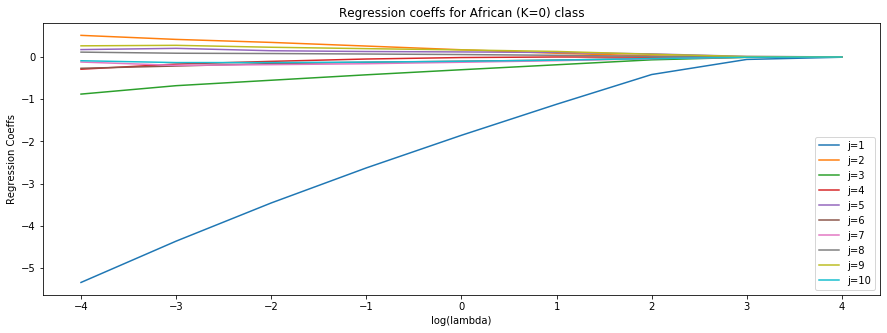

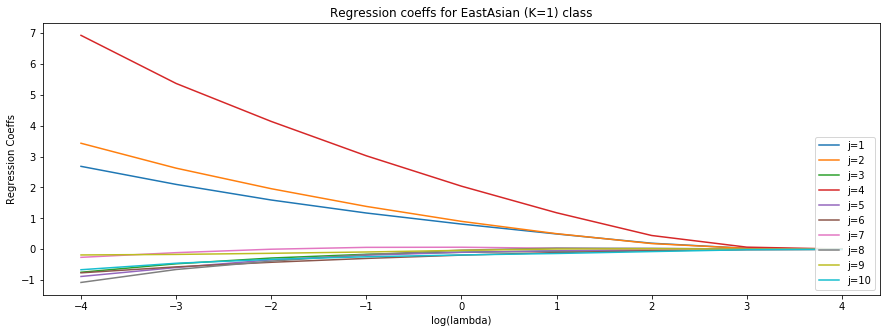

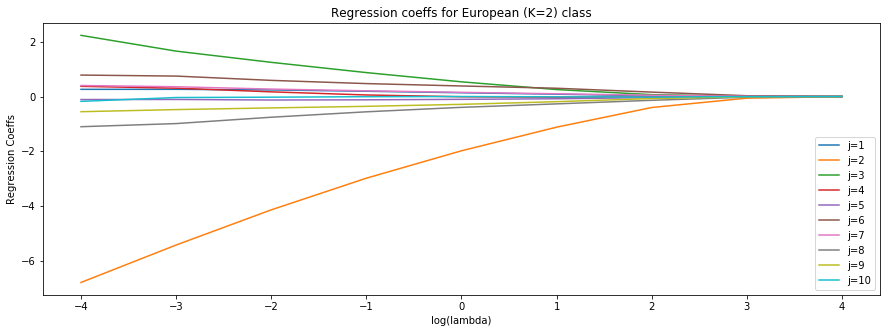

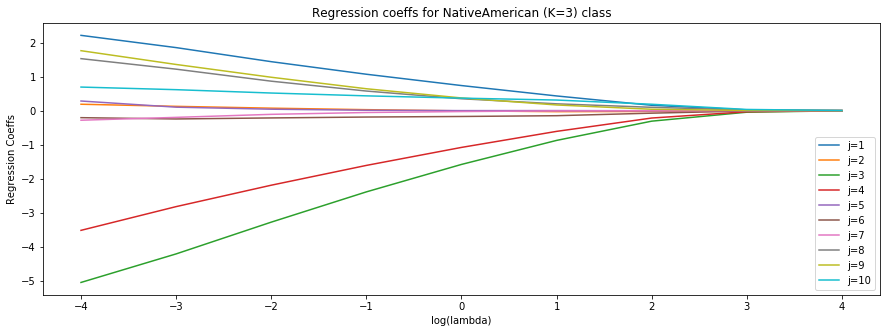

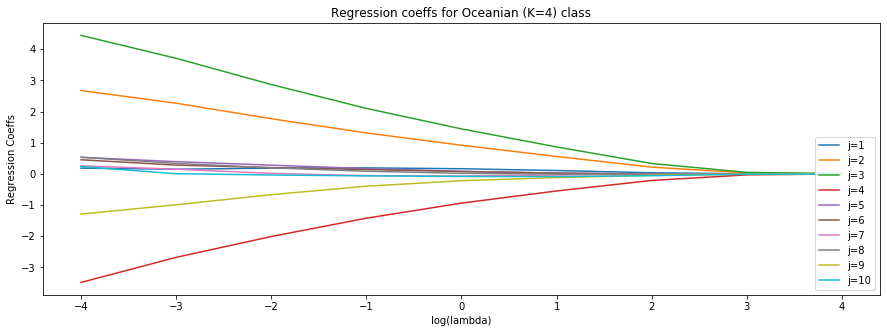

In [13]:
# Generating plots 

num_features = X_train.shape[1]
num_classes  = len(target_names)
num_lmbdas   = len(lmbdas)

for i in range(num_classes) :
    plt.figure(figsize=(15,5))
    plt.title("Regression coeffs for {} (K={}) class".format(target_names[i], i))
    plt.xlabel("log(lambda)")
    plt.ylabel("Regression Coeffs")
    for j in range(num_features) :
        coeffs = arr_B_reg_coeffs[:,i,j]
        plt.plot(log_lmbdas , coeffs, label="j={}".format(j+1))
    plt.legend(loc="lower right")


Computing 5-fold cross validation error for tuning parameter=0.0001
CV_error 0.0006328239893048859
Computing 5-fold cross validation error for tuning parameter=0.001
CV_error 0.0012554085455905102
Computing 5-fold cross validation error for tuning parameter=0.01
CV_error 0.0031772307960654155
Computing 5-fold cross validation error for tuning parameter=0.1
CV_error 0.011500823573742169
Computing 5-fold cross validation error for tuning parameter=1.0
CV_error 0.05167727903950954
Computing 5-fold cross validation error for tuning parameter=10.0
CV_error 0.23832569202175438
Computing 5-fold cross validation error for tuning parameter=100.0
CV_error 0.8751385552168836
Computing 5-fold cross validation error for tuning parameter=1000.0
CV_error 1.4440292476782468
Computing 5-fold cross validation error for tuning parameter=10000.0
CV_error 1.5422484707932003


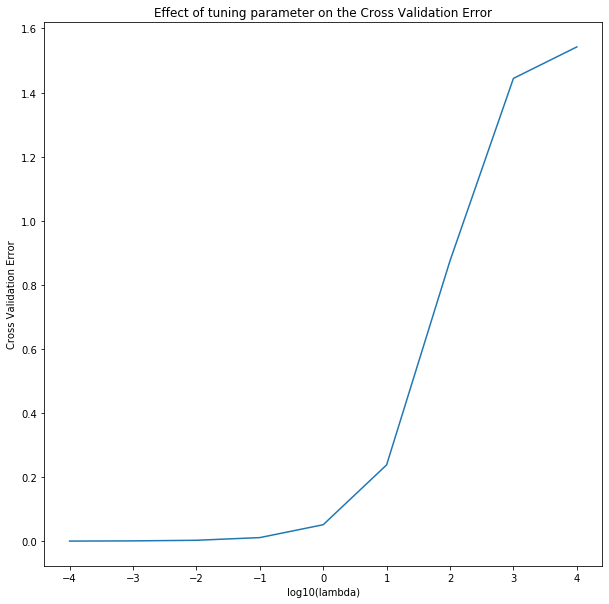

In [14]:

"""# Deliverable 2 using sklearn"""

lmbdas     = np.array([1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4])
log_lmbdas = np.log10(lmbdas)
#print(log_lmbda)

# Performing 5 fold cross validation 
fold_factor = 5 

CV_errors = [] # initializing empty list for storing the cross validation errors for each of the tuning parameter lmbda values     
for i, lmbda in enumerate(lmbdas) :
    print('Computing 5-fold cross validation error for tuning parameter={}'.format(lmbda))
    categorical_crossentropy_losses = []
    model = LogisticRegression(penalty='l2' , C = 1/lmbda , random_state=0 , max_iter = 10000)
    scores = cross_val_score(model, X_train, y_train, cv=fold_factor, scoring='neg_log_loss')
    losses = -scores
    categorical_crossentropy_losses.append(losses)
    CV_error = np.mean(categorical_crossentropy_losses)
    CV_errors.append(CV_error)    
    print("CV_error", CV_error)

plt.figure()
plt.xlabel('log10(lambda)')
plt.ylabel('Cross Validation Error')
plt.title('Effect of tuning parameter on the Cross Validation Error')
plt.plot(log_lmbdas, CV_errors)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()


In [16]:

"""# Deliverable 3 using sklearn

Best tuning parameter using sklearn - 0.0001

# Deliverable 4 using sklearn
"""

# Finding learned regression coefficients for each of lmbda values

best_lmbda = 1e-4
# Fit model to entire training data
model = LogisticRegression(penalty='l2' , C = 1/best_lmbda , random_state=0 , max_iter = 10000)
model.fit(X_train, y_train)
B_reg_coeffs = model.coef_ # numpy array with learned coefficient values of shape n_classes x n_features . Note that the bias or intercept term is not included    
B_reg_intercept = model.intercept_

# Read inputs from csv test file 
test_filename = r'C:\Users\AXW0J9E\Downloads\Genetic-Predictor-main\Genetic-Predictor-main\TestData_N111_p10.csv'
test_data     = pd.read_csv(test_filename)

# Creating numpy array for training features X 
X_test = np.array(test_data.iloc[:,:-1])
#print(X_test.shape)

# Normalizing features in X_test as per StandardScalar scaler fitted on training data
X_test = scaler.transform(X_test)


y_pred_probs = model.predict_proba(X_test)
y_pred_labels = model.predict(X_test)
y_pred_label_names = le.inverse_transform(y_pred_labels)
#print(y_pred_probs.shape)
print(y_pred_probs[:5])
#print(y_pred_labels.shape)
print(y_pred_labels[:5])
#print(y_pred_label_names.shape)
print(y_pred_label_names[:5])

[[2.48754433e-08 2.79783675e-10 1.03796889e-08 5.31214083e-09
  9.99999959e-01]
 [2.99048865e-09 4.01301949e-10 8.39741954e-09 9.99999958e-01
  3.06768346e-08]
 [5.40258785e-07 2.75362055e-06 9.99996578e-01 1.62903617e-09
  1.26306728e-07]
 [9.99963803e-01 1.96031359e-09 3.30876166e-08 1.63920352e-09
  3.61605607e-05]
 [2.54958790e-10 9.99999999e-01 4.29478106e-11 8.55299960e-10
  2.12632623e-12]]
[4 3 2 0 1]
['Oceanian' 'NativeAmerican' 'European' 'African' 'EastAsian']
